In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ex2data1.txt', header=None)
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
X = df.loc[:, :1]
X = np.c_[np.ones(df.shape[0]), X]

Y = df.loc[:, 2]
X.shape

(100, 3)

In [11]:
def compute_cost(theta, X, Y):
    m = X.shape[0]
    return -1/m * sum( np.multiply(Y, np.log( 1/(1 + np.exp(-np.matmul(X, theta))) )) + np.multiply( (1 - Y), np.log(1 - 1/(1 + np.exp(-np.matmul(X, theta)))) ) )

In [14]:
def gradient(theta, X, Y):
    m = X.shape[0]
    return np.matmul( np.transpose(1/(1 + np.exp(-np.matmul(X, theta))) - Y ), X) / m

In [19]:
from scipy.optimize import minimize
result = minimize(compute_cost, x0=[0, 0, 0], args=(X, Y), method ='CG', jac=gradient)

/tmp/ipykernel_403039/2096433953.py:3: RuntimeWarning: divide by zero encountered in log
  return -1/m * sum( np.multiply(Y, np.log( 1/(1 + np.exp(-np.matmul(X, theta))) )) + np.multiply( (1 - Y), np.log(1 - 1/(1 + np.exp(-np.matmul(X, theta)))) ) )


In [20]:
cost = result.fun
theta = result.x

In [21]:
theta

array([-25.15951923,   0.2062172 ,   0.20145692])

In [22]:
cost

0.20349770207898846

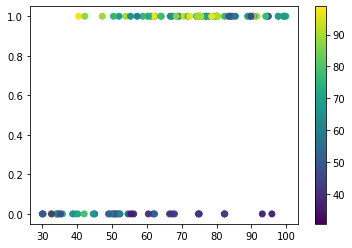

In [34]:
plt.scatter(X[:, 1], Y, c=X[:, 2])
plt.colorbar()

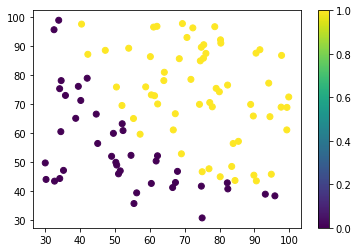

In [26]:
plt.scatter(X[:, 1], X[:, 2], c=Y)
plt.colorbar()

In [29]:
h_theta = np.matmul(X, np.transpose(theta) )

In [18]:
compute_cost(theta)

0.693147180559946

In [19]:
np.multiply(Y, np.log( 1/(1 + np.exp(-np.matmul(X, theta))) )) + np.multiply( (1 - Y), np.log(1 - 1/(1 + np.exp(-np.matmul(X, theta)))) )

0    -0.693147
1    -0.693147
2    -0.693147
3    -0.693147
4    -0.693147
        ...   
95   -0.693147
96   -0.693147
97   -0.693147
98   -0.693147
99   -0.693147
Name: 2, Length: 100, dtype: float64

In [20]:
from scipy.optimize import minimize

cost = minimize(compute_cost, x0=[0, 0, 0], method='CG')

/tmp/ipykernel_397007/3013826245.py:3: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * sum( np.multiply(Y, np.log( 1/(1 + np.exp(-np.matmul(X, theta))) )) + np.multiply( (1 - Y), np.log(1 - 1/(1 + np.exp(-np.matmul(X, theta)))) ) )
/tmp/ipykernel_397007/3013826245.py:3: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * sum( np.multiply(Y, np.log( 1/(1 + np.exp(-np.matmul(X, theta))) )) + np.multiply( (1 - Y), np.log(1 - 1/(1 + np.exp(-np.matmul(X, theta)))) ) )
/tmp/ipykernel_397007/3013826245.py:3: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * sum( np.multiply(Y, np.log( 1/(1 + np.exp(-np.matmul(X, theta))) )) + np.multiply( (1 - Y), np.log(1 - 1/(1 + np.exp(-np.matmul(X, theta)))) ) )


In [21]:
cost

     fun: nan
     jac: array([nan, nan, nan])
 message: 'NaN result encountered.'
    nfev: 448
     nit: 1
    njev: 112
  status: 3
 success: False
       x: array([  6.28160469, 754.37095591, 707.48666413])

<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('admittance.csv')
df.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [3]:
df['Admitted'] = df['Admitted'].map({'Yes': 1, 'No': 0})
# df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


$$ J(\theta) = - \frac{1}{m} \sum(  (y^{(i)}\log(h(X)) + (1 - y^{(i)})(\log(1 - h(X)))  ) $$

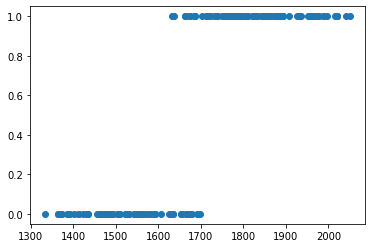

In [4]:
plt.scatter(df['SAT'], df['Admitted'])

In [5]:
X = df['SAT']
Y = df['Admitted'].to_numpy()
# difference = (np.max(X) - np.min(X)) # Scaling
X = np.c_[np.ones(df.shape[0]), X]
X.shape

(168, 2)

$$ h(X) = \frac{1}{1-e^{- \theta X}} $$

In [40]:
s = [1, 2, np.inf, np.inf]
sum(s)

inf

In [37]:
def compute_cost(theta):
    m = X.shape[0]
    cost = -1/m * sum( np.multiply(Y, np.log( 1/(1 + np.exp(-np.matmul(X, theta))) )) + np.multiply( (1 - Y), np.log(1 - 1/(1 + np.exp(-np.matmul(X, theta)))) ) )
    # cost = np.multiply(Y, np.log( 1/(1 + np.exp(-np.matmul(X, theta))) )) + np.multiply( (1 - Y), np.log(1 - (1/(1 + np.exp(-np.matmul(X, theta))))  ) )
    #grad = np.matmul( np.transpose(1/(1 + np.exp(-np.matmul(X, theta))) - Y ), X) / m
    return cost#, grad

In [38]:
from scipy.optimize import minimize
minimize(J, x0=[0, 0, 0], args=(X, y), method ='CG', jac=gradient)
cost = minimize(compute_cost, x0=[0, 0], method='CG')

/tmp/ipykernel_27501/3729702260.py:3: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * sum( np.multiply(Y, np.log( 1/(1 + np.exp(-np.matmul(X, theta))) )) + np.multiply( (1 - Y), np.log(1 - 1/(1 + np.exp(-np.matmul(X, theta)))) ) )
/tmp/ipykernel_27501/3729702260.py:3: RuntimeWarning: invalid value encountered in multiply
  cost = -1/m * sum( np.multiply(Y, np.log( 1/(1 + np.exp(-np.matmul(X, theta))) )) + np.multiply( (1 - Y), np.log(1 - 1/(1 + np.exp(-np.matmul(X, theta)))) ) )
/tmp/ipykernel_27501/3729702260.py:3: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * sum( np.multiply(Y, np.log( 1/(1 + np.exp(-np.matmul(X, theta))) )) + np.multiply( (1 - Y), np.log(1 - 1/(1 + np.exp(-np.matmul(X, theta)))) ) )
/tmp/ipykernel_27501/3729702260.py:3: RuntimeWarning: invalid value encountered in multiply
  cost = -1/m * sum( np.multiply(Y, np.log( 1/(1 + np.exp(-np.matmul(X, theta))) )) + np.multiply( (1 - Y), np.log(1 - 1/(1 + np.exp(-np.matmul(X, theta)))) 

In [39]:
cost

     fun: nan
     jac: array([nan, nan])
 message: 'NaN result encountered.'
    nfev: 336
     nit: 1
    njev: 112
  status: 3
 success: False
       x: array([3.50256315e-01, 1.03423994e+03])